In [1]:
import pandas as pd

In [2]:
bus_stops = pd.read_csv("bus_stops.csv")
bus_routes = pd.read_csv("bus_routes.csv")
tp_nodes = pd.read_csv("tp_three_months.csv")

In [3]:
# Latitude and Longitude are separately stored
print(bus_stops)

      BusStopCode           RoadName             Description  Latitude  \
0            1012        Victoria St     Hotel Grand Pacific  1.296848   
1            1013        Victoria St         St. Joseph's Ch  1.297710   
2            1019        Victoria St         Bras Basah Cplx  1.296990   
3            1029      Nth Bridge Rd            Opp Natl Lib  1.296673   
4            1039      Nth Bridge Rd              Bugis Cube  1.298208   
...           ...                ...                     ...       ...   
5044        99139  Changi Village Rd                   Blk 5  1.388195   
5045        99161          Nicoll Dr   Bef Changi Beach CP 3  1.390262   
5046        99171          Nicoll Dr       Changi Beach CP 2  1.391128   
5047        99181      Telok Paku Rd  Bef S'pore Aviation Ac  1.387754   
5048        99189      Telok Paku Rd      S'pore Aviation Ac  1.388414   

       Longitude  
0     103.852536  
1     103.853225  
2     103.853022  
3     103.854414  
4     103.855491

In [4]:
# import matplotlib.pyplot as plt

In [5]:
# plt.scatter(x = bus_stops.Longitude, y = bus_stops.Latitude)

In [6]:
# print(bus_routes)

In [7]:
# Merging the 2 files on the "BusStopCode" column

# ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

# Concat does not give me what I want.
# bus_r_and_s = pd.concat((bus_stops, bus_routes), axis = 1)

print(bus_routes.dtypes)

ServiceNo        object
Operator         object
Direction         int64
StopSequence      int64
BusStopCode      object
Distance        float64
WD_FirstBus      object
WD_LastBus       object
SAT_FirstBus     object
SAT_LastBus      object
SUN_FirstBus     object
SUN_LastBus      object
dtype: object


In [8]:
print(bus_stops.dtypes)

BusStopCode      int64
RoadName        object
Description     object
Latitude       float64
Longitude      float64
dtype: object


In [9]:
bus_stops["BusStopCode"] = bus_stops["BusStopCode"].astype("str").str.zfill(5)
bus_routes["BusStopCode"] = bus_routes["BusStopCode"].astype("str").str.zfill(5)
tp_nodes["PT_CODE"] = tp_nodes["PT_CODE"].astype("str").str.zfill(5)

In [10]:
bus_r_and_s = bus_stops.merge(bus_routes, how="left", on="BusStopCode")
bus_r_and_s.head()

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,0608,0017,0611,0018,0640,0018
1,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12e,GAS,2,7,3.9,1248,2347,1248,2346,1248,2345
2,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,175,SBST,1,44,19.0,0706,0028,0700,0027,0657,0025
3,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,2,GAS,2,8,3.8,0555,0017,0553,0017,0555,0016
4,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,2A,GAS,1,8,3.8,0637,1916,-,-,-,-


In [11]:
# adding on the tp data
bus_data_final = bus_r_and_s.merge(tp_nodes, how="left", left_on="BusStopCode", right_on="PT_CODE")

In [12]:
bus_data_final.head()

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,...,SUN_FirstBus,SUN_LastBus,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0640,0018,22218.0,2021-03,WEEKDAY,23.0,BUS,01012,790.0,194.0
1,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0640,0018,22219.0,2021-03,WEEKENDS/HOLIDAY,23.0,BUS,01012,317.0,88.0
2,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0640,0018,24644.0,2021-03,WEEKDAY,11.0,BUS,01012,747.0,1314.0
3,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0640,0018,24645.0,2021-03,WEEKENDS/HOLIDAY,11.0,BUS,01012,279.0,534.0
4,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0640,0018,45968.0,2021-03,WEEKDAY,5.0,BUS,01012,88.0,39.0


In [13]:
# Sort by Total Tap Out Volume
sorted_bus_data = bus_data_final.sort_values("TOTAL_TAP_OUT_VOLUME", ascending=False)

In [14]:
# Highest Volume of Tap-Outs at a bus stop
sorted_bus_data.iloc[0]

BusStopCode                          22009
RoadName                Jurong West Ctrl 3
Description                   Boon Lay Int
Latitude                          1.339323
Longitude                       103.705457
ServiceNo                             180A
Operator                              SMRT
Direction                                1
StopSequence                             1
Distance                               0.0
WD_FirstBus                           1823
WD_LastBus                            2345
SAT_FirstBus                          2313
SAT_LastBus                           2345
SUN_FirstBus                          2311
SUN_LastBus                           2345
Unnamed: 0                        169951.0
YEAR_MONTH                         2021-03
DAY_TYPE                           WEEKDAY
TIME_PER_HOUR                          7.0
PT_TYPE                                BUS
PT_CODE                              22009
TOTAL_TAP_IN_VOLUME               103773.0
TOTAL_TAP_O

In [15]:
# Lowest Volume of Tap-Outs at a bus stop
sorted_bus_data.iloc[-1]
# Why is it NaN?

BusStopCode                            93189
RoadName                East Coast Pk Svc Rd
Description                  Opp Victoria JC
Latitude                            1.303652
Longitude                         103.919553
ServiceNo                                401
Operator                                SBST
Direction                                  1
StopSequence                              13
Distance                                 6.4
WD_FirstBus                                -
WD_LastBus                                 -
SAT_FirstBus                            1417
SAT_LastBus                             2216
SUN_FirstBus                            1017
SUN_LastBus                             2017
Unnamed: 0                               NaN
YEAR_MONTH                               NaN
DAY_TYPE                                 NaN
TIME_PER_HOUR                            NaN
PT_TYPE                                  NaN
PT_CODE                                  NaN
TOTAL_TAP_

In [16]:
# Sorted by Tap In Volumes
sorted_bus_data_in = bus_data_final.sort_values("TOTAL_TAP_IN_VOLUME", ascending=False)

In [17]:
# Highest Volume of Tap-Ins at a bus stop
sorted_bus_data_in.iloc[0]

BusStopCode                          22009
RoadName                Jurong West Ctrl 3
Description                   Boon Lay Int
Latitude                          1.339323
Longitude                       103.705457
ServiceNo                             179A
Operator                              SBST
Direction                                1
StopSequence                             1
Distance                               0.0
WD_FirstBus                           0731
WD_LastBus                            0930
SAT_FirstBus                             -
SAT_LastBus                              -
SUN_FirstBus                             -
SUN_LastBus                              -
Unnamed: 0                          2480.0
YEAR_MONTH                         2021-03
DAY_TYPE                           WEEKDAY
TIME_PER_HOUR                         18.0
PT_TYPE                                BUS
PT_CODE                              22009
TOTAL_TAP_IN_VOLUME               141119.0
TOTAL_TAP_O

In [18]:
# Lowest Volume of Tap-Ins at a bus stop
sorted_bus_data_in.iloc[-1]

BusStopCode                            93189
RoadName                East Coast Pk Svc Rd
Description                  Opp Victoria JC
Latitude                            1.303652
Longitude                         103.919553
ServiceNo                                401
Operator                                SBST
Direction                                  1
StopSequence                              13
Distance                                 6.4
WD_FirstBus                                -
WD_LastBus                                 -
SAT_FirstBus                            1417
SAT_LastBus                             2216
SUN_FirstBus                            1017
SUN_LastBus                             2017
Unnamed: 0                               NaN
YEAR_MONTH                               NaN
DAY_TYPE                                 NaN
TIME_PER_HOUR                            NaN
PT_TYPE                                  NaN
PT_CODE                                  NaN
TOTAL_TAP_

In [19]:
tp_nodes_mar = pd.read_csv("transport_node_bus_202103.csv")
tp_nodes_mar["PT_CODE"] = tp_nodes_mar["PT_CODE"].astype("str").str.zfill(5)
bus_data_mar = bus_r_and_s.merge(tp_nodes_mar, how="left", left_on="BusStopCode", right_on="PT_CODE")

In [20]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# SAMPLE GRAPH PLOTTING
graph_data = bus_data_mar
graph_data.head()

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,...,SAT_LastBus,SUN_FirstBus,SUN_LastBus,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0018,0640,0018,2021-03,WEEKDAY,23.0,BUS,01012,790.0,194.0
1,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0018,0640,0018,2021-03,WEEKENDS/HOLIDAY,23.0,BUS,01012,317.0,88.0
2,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0018,0640,0018,2021-03,WEEKDAY,11.0,BUS,01012,747.0,1314.0
3,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0018,0640,0018,2021-03,WEEKENDS/HOLIDAY,11.0,BUS,01012,279.0,534.0
4,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,...,0018,0640,0018,2021-03,WEEKDAY,5.0,BUS,01012,88.0,39.0


In [22]:
condition1 = graph_data["ServiceNo"] == "10" 
condition2 = graph_data["Direction"] == 1
service_10 = graph_data[condition1 & condition2]

In [24]:
service_10.head()

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,...,SAT_LastBus,SUN_FirstBus,SUN_LastBus,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
18447,02119,Nicoll Highway,Opp War Memorial Pk,1.291844,103.855343,10,SBST,1,43,18.6,...,2356,0551,2354,2021-03,WEEKENDS/HOLIDAY,9.0,BUS,02119,23.0,92.0
18448,02119,Nicoll Highway,Opp War Memorial Pk,1.291844,103.855343,10,SBST,1,43,18.6,...,2356,0551,2354,2021-03,WEEKDAY,9.0,BUS,02119,180.0,736.0
18449,02119,Nicoll Highway,Opp War Memorial Pk,1.291844,103.855343,10,SBST,1,43,18.6,...,2356,0551,2354,2021-03,WEEKENDS/HOLIDAY,23.0,BUS,02119,75.0,7.0
18450,02119,Nicoll Highway,Opp War Memorial Pk,1.291844,103.855343,10,SBST,1,43,18.6,...,2356,0551,2354,2021-03,WEEKDAY,23.0,BUS,02119,201.0,14.0
18451,02119,Nicoll Highway,Opp War Memorial Pk,1.291844,103.855343,10,SBST,1,43,18.6,...,2356,0551,2354,2021-03,WEEKENDS/HOLIDAY,15.0,BUS,02119,109.0,76.0


In [25]:
service_10.shape

(2975, 23)

In [26]:
service_10.tail()

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,...,SAT_LastBus,SUN_FirstBus,SUN_LastBus,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
1034787,96289,Simei Ave,Changi General Hosp,1.340055,103.948381,10,SBST,1,4,2.3,...,2309,0507,2308,2021-03,WEEKENDS/HOLIDAY,14.0,BUS,96289,618.0,329.0
1034788,96289,Simei Ave,Changi General Hosp,1.340055,103.948381,10,SBST,1,4,2.3,...,2309,0507,2308,2021-03,WEEKDAY,15.0,BUS,96289,1950.0,2108.0
1034789,96289,Simei Ave,Changi General Hosp,1.340055,103.948381,10,SBST,1,4,2.3,...,2309,0507,2308,2021-03,WEEKENDS/HOLIDAY,15.0,BUS,96289,378.0,273.0
1034790,96289,Simei Ave,Changi General Hosp,1.340055,103.948381,10,SBST,1,4,2.3,...,2309,0507,2308,2021-03,WEEKENDS/HOLIDAY,6.0,BUS,96289,168.0,1341.0
1034791,96289,Simei Ave,Changi General Hosp,1.340055,103.948381,10,SBST,1,4,2.3,...,2309,0507,2308,2021-03,WEEKDAY,6.0,BUS,96289,1688.0,6868.0


In [27]:
# Merge some columns in the Data
# for label, row in service_10.iterrows():
#     print(str(label) + ":" + str(row["DAY_TYPE"]) + " " + str(row["TIME_PER_HOUR"]))
#     dict_data = {}

# Filter out repeats of the same BusStopCode
s10_no_repeats = service_10.drop_duplicates(subset='BusStopCode')
s10_no_repeats

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,...,SAT_LastBus,SUN_FirstBus,SUN_LastBus,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
18447,02119,Nicoll Highway,Opp War Memorial Pk,1.291844,103.855343,10,SBST,1,43,18.6,...,2356,0551,2354,2021-03,WEEKENDS/HOLIDAY,9.0,BUS,02119,23.0,92.0
22245,03019,Collyer Quay,OUE Bayfront,1.284245,103.853108,10,SBST,1,44,19.6,...,2359,0553,2356,2021-03,WEEKDAY,10.0,BUS,03019,471.0,2146.0
24151,03059,Raffles Quay,One Raffles Quay,1.281111,103.851461,10,SBST,1,45,19.9,...,2400,0554,2357,2021-03,WEEKDAY,12.0,BUS,03059,780.0,1264.0
27731,03129,Shenton Way,UIC Bldg,1.278070,103.849567,10,SBST,1,46,20.3,...,0001,0555,2358,2021-03,WEEKDAY,14.0,BUS,03129,1009.0,1864.0
29835,03217,Shenton Way,Opp AXA Twr,1.275522,103.847944,10,SBST,1,47,20.6,...,0002,0556,2359,2021-03,WEEKENDS/HOLIDAY,17.0,BUS,03217,112.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020170,94069,Upp East Coast Rd,Opp Kew Green Condo,1.318097,103.950857,10,SBST,1,15,6.1,...,2322,0519,2321,2021-03,WEEKENDS/HOLIDAY,6.0,BUS,94069,25.0,8.0
1020810,94079,Upp East Coast Rd,Bedok Camp 2,1.319620,103.955243,10,SBST,1,14,5.5,...,2321,0518,2319,2021-03,WEEKENDS/HOLIDAY,13.0,BUS,94079,20.0,26.0
1021010,94089,Upp East Coast Rd,Calvary Ably Of God Ch,1.315363,103.942941,10,SBST,1,18,7.0,...,2324,0521,2323,2021-03,WEEKENDS/HOLIDAY,18.0,BUS,94089,57.0,58.0
1030200,96109,Simei Ave,Opp Blk 3012,1.337371,103.950673,10,SBST,1,5,2.7,...,2311,0508,2309,2021-03,WEEKDAY,17.0,BUS,96109,652.0,667.0


In [28]:
targets = []
for lab, row in s10_no_repeats.iterrows():
    targets += [row["BusStopCode"]]

In [29]:
len(targets)

74

In [30]:
# To confirm the number of bus stops along the route of bus 10
condition1 = bus_routes['ServiceNo'] == '10'
condition2 = bus_routes['Direction'] == 1
bus_10_route = bus_routes[condition1 & condition2]
bus_10_route

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,10,SBST,1,1,75009,0.0,0500,2300,0500,2300,0500,2300
1,10,SBST,1,2,76059,0.6,0502,2302,0502,2302,0502,2302
2,10,SBST,1,3,76069,1.1,0504,2304,0504,2304,0503,2304
3,10,SBST,1,4,96289,2.3,0508,2308,0508,2309,0507,2308
4,10,SBST,1,5,96109,2.7,0509,2310,0509,2311,0508,2309
...,...,...,...,...,...,...,...,...,...,...,...,...
69,10,SBST,1,70,16051,30.4,0623,0021,0618,0025,0617,0021
70,10,SBST,1,71,16061,30.6,0624,0021,0618,0026,0617,0021
71,10,SBST,1,72,16071,30.8,0625,0022,0619,0027,0618,0022
72,10,SBST,1,73,16081,31.1,0626,0023,0620,0028,0619,0023


In [31]:
bus_10_route.columns

Index(['ServiceNo', 'Operator', 'Direction', 'StopSequence', 'BusStopCode',
       'Distance', 'WD_FirstBus', 'WD_LastBus', 'SAT_FirstBus', 'SAT_LastBus',
       'SUN_FirstBus', 'SUN_LastBus'],
      dtype='object')

In [32]:
# print("The original list is : " + str(targets))
# only for loop buses:
# targets.append(targets.pop(targets.index("02119"))) 
# print("The modified element moved list is: " + str(targets))
targets.remove("02119")
targets.append(" ")

In [33]:
s10_no_repeats['Target'] = targets
s10_no_repeats.rename(columns = {'BusStopCode' : 'Source'}, inplace = True)

<ipython-input-33-ce507bee2d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s10_no_repeats['Target'] = targets
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [35]:
s10_no_repeats.reset_index()

,index,Source,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,...,SUN_FirstBus,SUN_LastBus,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,Target
0,18447,02119,Nicoll Highway,Opp War Memorial Pk,1.291844,103.855343,10,SBST,1,43,...,0551,2354,2021-03,WEEKENDS/HOLIDAY,9.0,BUS,02119,23.0,92.0,03019
1,22245,03019,Collyer Quay,OUE Bayfront,1.284245,103.853108,10,SBST,1,44,...,0553,2356,2021-03,WEEKDAY,10.0,BUS,03019,471.0,2146.0,03059
2,24151,03059,Raffles Quay,One Raffles Quay,1.281111,103.851461,10,SBST,1,45,...,0554,2357,2021-03,WEEKDAY,12.0,BUS,03059,780.0,1264.0,03129
3,27731,03129,Shenton Way,UIC Bldg,1.278070,103.849567,10,SBST,1,46,...,0555,2358,2021-03,WEEKDAY,14.0,BUS,03129,1009.0,1864.0,03217
4,29835,03217,Shenton Way,Opp AXA Twr,1.275522,103.847944,10,SBST,1,47,...,0556,2359,2021-03,WEEKENDS/HOLIDAY,17.0,BUS,03217,112.0,86.0,05649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1020170,94069,Upp East Coast Rd,Opp Kew Green Condo,1.318097,103.950857,10,SBST,1,15,...,0519,2321,2021-03,WEEKENDS/HOLIDAY,6.0,BUS,94069,25.0,8.0,94079
70,1020810,94079,Upp East Coast Rd,Bedok Camp 2,1.319620,103.955243,10,SBST,1,14,...,0518,2319,2021-03,WEEKENDS/HOLIDAY,13.0,BUS,94079,20.0,26.0,94089
71,1021010,94089,Upp East Coast Rd,Calvary Ably Of God Ch,1.315363,103.942941,10,SBST,1,18,...,0521,2323,2021-03,WEEKENDS/HOLIDAY,18.0,BUS,94089,57.0,58.0,96109
72,1030200,96109,Simei Ave,Opp Blk 3012,1.337371,103.950673,10,SBST,1,5,...,0508,2309,2021-03,WEEKDAY,17.0,BUS,96109,652.0,667.0,96289


In [36]:
s10_no_repeats.columns

Index(['Source', 'RoadName', 'Description', 'Latitude', 'Longitude',
       'ServiceNo', 'Operator', 'Direction', 'StopSequence', 'Distance',
       'WD_FirstBus', 'WD_LastBus', 'SAT_FirstBus', 'SAT_LastBus',
       'SUN_FirstBus', 'SUN_LastBus', 'YEAR_MONTH', 'DAY_TYPE',
       'TIME_PER_HOUR', 'PT_TYPE', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME',
       'TOTAL_TAP_OUT_VOLUME', 'Target'],
      dtype='object')

In [39]:
# attributes = ['Description', 'Latitude', 'Longitude']
G = [nx.from_pandas_edgelist(
    s10_no_repeats[s10_no_repeats.StopSequence==i], 
    source='Source', target='Target',
    edge_attr=['ServiceNo', 'Direction'])
     for i in range(1, 100)]

AttributeError: 'list' object has no attribute 'edges'

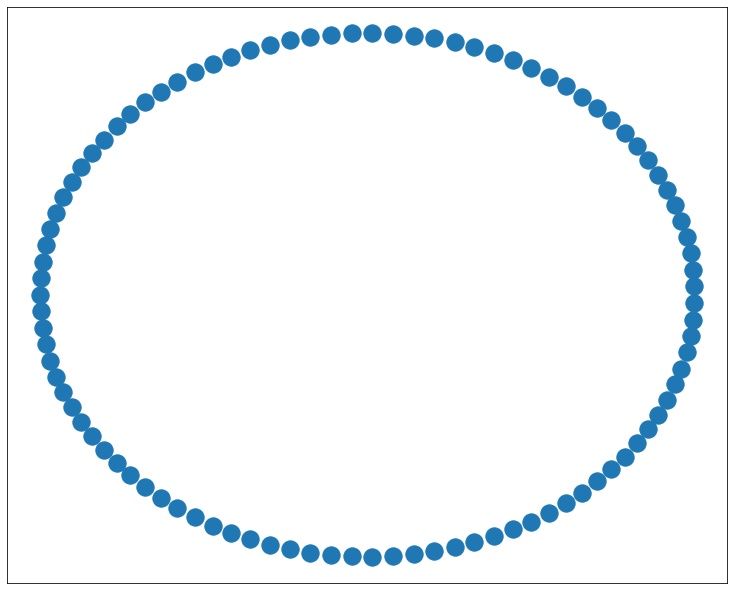

In [40]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
nx.draw_shell(G, with_labels = True)